# Neighborhood effects




In [1]:
using Plots
using EmpiricalBayes
using CSV
using DataFrames
using Distributions
using LaTeXStrings
using JLD
using Nullables
using Random: seed!

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.
┌ Info: Recompiling stale cache file /Users/ignatiad/.julia/compiled/v0.7/EmpiricalBayes/hd5Pc.ji for EmpiricalBayes [a19f57e5-db63-5b49-a8b8-e6824725db53]
└ @ Base loading.jl:1185


In [2]:
pgfplots()

Plots.PGFPlotsBackend()

In [3]:
chetty = CSV.read("datasets/chetty_hendren2005.csv", types=Dict(3=>String));

In [4]:
idx = [!ismissing(x) for x in chetty[:p25_coef]]
β_hat = [chetty[i,:p25_coef] for i in findall(idx)]
se_hat = [chetty[i,:p25_se] for i in findall(idx)]
z_scores = β_hat./se_hat;

In [5]:
size(chetty)

(741, 9)

In [6]:
target = PosteriorTarget(LFSRNumerator(2.0))

PosteriorTarget{LFSRNumerator}(LFSRNumerator(2.0), MarginalDensityTarget(2.0))

In [7]:
marginal_grid = collect(range(-5,stop=5,length=1001));
prior_grid = collect(range(-3,stop=3,length=121));
marginal_h = marginal_grid[2]-marginal_grid[1];

In [8]:
ds = MixingNormalConvolutionProblem(Normal, 0.2, prior_grid, marginal_grid);

In [9]:
seed!(34) 
Xs = z_scores
n_total = length(Xs)
n_half = ceil(Int, n_total/2)
idx_test = sample(1:n_total, n_half, replace=false)
idx_train = setdiff(1:n_total, idx_test)
Xs_train = Xs[idx_train]
Xs_test = Xs[idx_test];

In [10]:
extrema(Xs_train),extrema(Xs_test)

((-4.25, 3.494769874476988), (-3.5225225225225225, 3.3849607182940518))

In [11]:
xs = Float64.(collect(-3:0.5:3));

In [ ]:
ci_tmp = CEB_ci(Xs_train, Xs_test, ds, PosteriorTarget(PosteriorMeanNumerator(0.0))) 

In [9]:
post_mean_nb_cb = [CEB_ci(Xs_train, Xs_test, ds, PosteriorTarget(PosteriorMeanNumerator(x))) for x in xs];

UndefVarError: UndefVarError: CEB_ci_b not defined

In [13]:
left_ci_post_mean_nb_cb = [t[1].ci_left for t in post_mean_nb_cb]
right_ci_post_mean_nb_cb  =  [t[1].ci_right for t in post_mean_nb_cb]
point_est_post_mean_nb_cb  = [t[1].calibrated_target for t in post_mean_nb_cb];

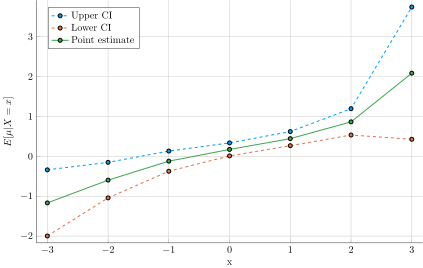

In [15]:
plot(xs, [right_ci_post_mean_nb_cb left_ci_post_mean_nb_cb point_est_post_mean_nb_cb],
     marker=([:hex :d]), label=["Upper CI" "Lower CI" "Point estimate"], 
     line=([:dash :dash :solid]), xlabel="x", ylabel=L"E[\mu | X=x]", legend=:topleft)

In [45]:
lfsr_nb = [CEB_ci(Xs_train, Xs_test, ds, PosteriorTarget(LFSRNumerator(x))) for x in xs];

Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic lice

In [46]:
save("chetty_lfsr_nb_May23.jld", "lfsr_nb", lfsr_nb)

In [52]:
left_ci_lfsr_nb = clamp.([t[1].ci_left for t in lfsr_nb],0,1)
right_ci_lfsr_nb  =  clamp.([t[1].ci_right for t in lfsr_nb],0,1)
point_est_lfsr_nb  = clamp.([t[1].calibrated_target for t in lfsr_nb],0,1);

In [55]:
yuma_x = -0.216/0.172

-1.255813953488372

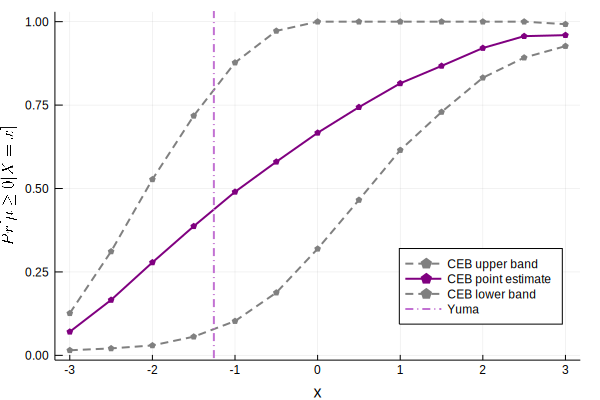

In [62]:
chetty_lfsr_bands = Plots.plot(xs, [right_ci_lfsr_nb  point_est_lfsr_nb  left_ci_lfsr_nb],
     label=["CEB upper band" "CEB point estimate" "CEB lower band"], 
     markershape=[:pentagon :pentagon :pentagon],
     markersize=3.5, markerstrokealpha=0, color=[:grey :purple :grey], linewidth=2,
     line=([:dash :solid :dash]), xlabel="x",ylabel=L"Pr[\mu \geq 0| X=x]",
     legend=:bottomright)
vline!([yuma_x], linewidth=2, label="Yuma", line=(:dashdot))

In [63]:
savefig(chetty_lfsr_bands, "chetty_lfsr_bands.pdf")

In [65]:
max_bias_contrib = [t[1].max_bias for t in lfsr_nb];
std_contrib = [t[1].std for t in lfsr_nb];


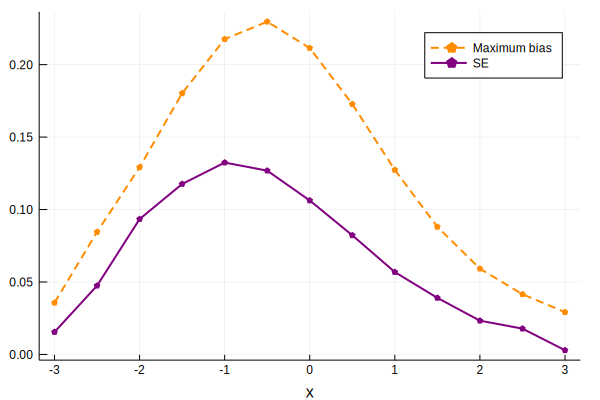

In [69]:
chetty_bias_var = Plots.plot(xs, [max_bias_contrib  std_contrib],
     label=["Maximum bias" "SE"], 
     markershape=[:pentagon :pentagon],
     markersize=3.5, markerstrokealpha=0, color=[:darkorange :purple], linewidth=2,
     line=([:dash :solid]), xlabel="x")

In [70]:
savefig(chetty_bias_var, "chetty_bias_var.pdf")